In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/vijaykumardevalla/Documents/ML in Business/HW5/spotify_listenership_sample.csv')

In [3]:
 df.head()

,track_id,track_name,track_artist,track_album_release_date,track_duration_ms,sound_danceability,sound_energy,sound_key,sound_loudness,sound_mode,...,sound_liveness,sound_valence,sound_tempo,genre_edm,genre_latin,genre_pop,genre_rnb,genre_rap,genre_rock,has_listenership
0,1iTZnsVqhCBdZqp9gjITDB,Run To You,Code 64,2006-06-16,267747,0.445,0.999,0,-5.627,1,...,0.0534,0.195,139.996,0,0,1,0,0,0,0
1,42LiXQn3xibOEodtBMoJp3,Drop The Bomb On 'Em,Eminem,2009-05-15,287267,0.892,0.693,11,-4.048,0,...,0.1230,0.357,91.989,0,0,0,0,1,0,0
2,2cTGafydY9vdnqJQ2Gw6t8,Butterflies,Myon,2018-06-22,234375,0.539,0.912,7,-3.113,1,...,0.2520,0.233,128.016,1,0,0,0,0,0,0
3,2boJnT3S2aSBagFEUTXrfx,Get Your Roll On,Big Tymers,2007-01-01,245200,0.849,0.812,7,-5.005,1,...,0.1090,0.454,88.930,0,0,0,0,1,0,0
4,5HzekjQF7xLqBVeynqprDk,By Your Side,Ballin Entertainment,2008-04-20,198165,0.802,0.823,3,-9.799,0,...,0.2640,0.964,130.771,0,1,0,0,0,0,0


In [4]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  2999 non-null   object 
 1   track_name                2999 non-null   object 
 2   track_artist              2999 non-null   object 
 3   track_album_release_date  2999 non-null   object 
 4   track_duration_ms         2999 non-null   int64  
 5   sound_danceability        2999 non-null   float64
 6   sound_energy              2999 non-null   float64
 7   sound_key                 2999 non-null   int64  
 8   sound_loudness            2999 non-null   float64
 9   sound_mode                2999 non-null   int64  
 10  sound_speechiness         2999 non-null   float64
 11  sound_acousticness        2999 non-null   float64
 12  sound_instrumentalness    2999 non-null   float64
 13  sound_liveness            2999 non-null   float64
 14  sound_va

In [5]:
# Select object columns
object_columns = df.select_dtypes(include=['object']).columns.tolist()
print(object_columns)

['track_id', 'track_name', 'track_artist', 'track_album_release_date']


In [6]:
df_numeric = df.drop(columns=object_columns)

In [7]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   track_duration_ms       2999 non-null   int64  
 1   sound_danceability      2999 non-null   float64
 2   sound_energy            2999 non-null   float64
 3   sound_key               2999 non-null   int64  
 4   sound_loudness          2999 non-null   float64
 5   sound_mode              2999 non-null   int64  
 6   sound_speechiness       2999 non-null   float64
 7   sound_acousticness      2999 non-null   float64
 8   sound_instrumentalness  2999 non-null   float64
 9   sound_liveness          2999 non-null   float64
 10  sound_valence           2999 non-null   float64
 11  sound_tempo             2999 non-null   float64
 12  genre_edm               2999 non-null   int64  
 13  genre_latin             2999 non-null   int64  
 14  genre_pop               2999 non-null   

In [8]:
float64_columns = df_numeric.select_dtypes(include=['float64']).columns.tolist()
print(float64_columns)

['sound_danceability', 'sound_energy', 'sound_loudness', 'sound_speechiness', 'sound_acousticness', 'sound_instrumentalness', 'sound_liveness', 'sound_valence', 'sound_tempo']


In [9]:
df_numeric=df_numeric.round(decimals=1)

In [10]:
df_numeric

,track_duration_ms,sound_danceability,sound_energy,sound_key,sound_loudness,sound_mode,sound_speechiness,sound_acousticness,sound_instrumentalness,sound_liveness,sound_valence,sound_tempo,genre_edm,genre_latin,genre_pop,genre_rnb,genre_rap,genre_rock,has_listenership
0,267747,0.4,1.0,0,-5.6,1,0.1,0.0,0.2,0.1,0.2,140.0,0,0,1,0,0,0,0
1,287267,0.9,0.7,11,-4.0,0,0.2,0.0,0.0,0.1,0.4,92.0,0,0,0,0,1,0,0
2,234375,0.5,0.9,7,-3.1,1,0.0,0.1,0.0,0.3,0.2,128.0,1,0,0,0,0,0,0
3,245200,0.8,0.8,7,-5.0,1,0.1,0.0,0.0,0.1,0.5,88.9,0,0,0,0,1,0,0
4,198165,0.8,0.8,3,-9.8,0,0.1,0.4,0.0,0.3,1.0,130.8,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,179217,0.7,0.9,8,-3.6,0,0.0,0.0,0.0,0.1,0.7,126.0,1,0,0,0,0,0,1
2995,196307,0.9,0.8,10,-5.6,0,0.1,0.0,0.0,0.3,0.9,115.0,0,0,1,0,0,0,1
2996,142359,0.7,0.4,2,-4.5,0,0.1,0.7,0.7,0.1,0.5,80.0,0,0,0,1,0,0,1
2997,188893,0.8,0.6,1,-5.0,0,0.1,0.0,0.0,0.1,0.7,103.0,0,0,1,0,0,0,1


In [11]:
df.head()

,track_id,track_name,track_artist,track_album_release_date,track_duration_ms,sound_danceability,sound_energy,sound_key,sound_loudness,sound_mode,...,sound_liveness,sound_valence,sound_tempo,genre_edm,genre_latin,genre_pop,genre_rnb,genre_rap,genre_rock,has_listenership
0,1iTZnsVqhCBdZqp9gjITDB,Run To You,Code 64,2006-06-16,267747,0.445,0.999,0,-5.627,1,...,0.0534,0.195,139.996,0,0,1,0,0,0,0
1,42LiXQn3xibOEodtBMoJp3,Drop The Bomb On 'Em,Eminem,2009-05-15,287267,0.892,0.693,11,-4.048,0,...,0.1230,0.357,91.989,0,0,0,0,1,0,0
2,2cTGafydY9vdnqJQ2Gw6t8,Butterflies,Myon,2018-06-22,234375,0.539,0.912,7,-3.113,1,...,0.2520,0.233,128.016,1,0,0,0,0,0,0
3,2boJnT3S2aSBagFEUTXrfx,Get Your Roll On,Big Tymers,2007-01-01,245200,0.849,0.812,7,-5.005,1,...,0.1090,0.454,88.930,0,0,0,0,1,0,0
4,5HzekjQF7xLqBVeynqprDk,By Your Side,Ballin Entertainment,2008-04-20,198165,0.802,0.823,3,-9.799,0,...,0.2640,0.964,130.771,0,1,0,0,0,0,0


In [12]:
df_numeric.head()

,track_duration_ms,sound_danceability,sound_energy,sound_key,sound_loudness,sound_mode,sound_speechiness,sound_acousticness,sound_instrumentalness,sound_liveness,sound_valence,sound_tempo,genre_edm,genre_latin,genre_pop,genre_rnb,genre_rap,genre_rock,has_listenership
0,267747,0.4,1.0,0,-5.6,1,0.1,0.0,0.2,0.1,0.2,140.0,0,0,1,0,0,0,0
1,287267,0.9,0.7,11,-4.0,0,0.2,0.0,0.0,0.1,0.4,92.0,0,0,0,0,1,0,0
2,234375,0.5,0.9,7,-3.1,1,0.0,0.1,0.0,0.3,0.2,128.0,1,0,0,0,0,0,0
3,245200,0.8,0.8,7,-5.0,1,0.1,0.0,0.0,0.1,0.5,88.9,0,0,0,0,1,0,0
4,198165,0.8,0.8,3,-9.8,0,0.1,0.4,0.0,0.3,1.0,130.8,0,1,0,0,0,0,0


In [13]:
df_numeric.isnull().sum()

track_duration_ms         0
sound_danceability        0
sound_energy              0
sound_key                 0
sound_loudness            0
sound_mode                0
sound_speechiness         0
sound_acousticness        0
sound_instrumentalness    0
sound_liveness            0
sound_valence             0
sound_tempo               0
genre_edm                 0
genre_latin               0
genre_pop                 0
genre_rnb                 0
genre_rap                 0
genre_rock                0
has_listenership          0
dtype: int64

In [14]:
# Summary statistics for the dataset
summary_stats = df_numeric.describe(include='all')

# Display the summary statistics
summary_stats


,track_duration_ms,sound_danceability,sound_energy,sound_key,sound_loudness,sound_mode,sound_speechiness,sound_acousticness,sound_instrumentalness,sound_liveness,sound_valence,sound_tempo,genre_edm,genre_latin,genre_pop,genre_rnb,genre_rap,genre_rock,has_listenership
count,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000
mean,234250.801267,0.650450,0.713338,5.321107,-6.777593,0.579860,0.103001,0.158186,0.091864,0.193164,0.512604,121.087563,0.198733,0.156385,0.141714,0.167056,0.167723,0.168389,0.500167
std,65059.024433,0.149624,0.184350,3.617455,3.053385,0.493663,0.114919,0.219068,0.231912,0.159980,0.241758,26.196857,0.399113,0.363281,0.348815,0.373088,0.373682,0.374274,0.500083
min,29493.000000,0.100000,0.100000,0.000000,-36.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,191957.000000,0.600000,0.600000,2.000000,-8.200000,0.000000,0.000000,0.000000,0.000000,0.100000,0.300000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,223027.000000,0.700000,0.700000,6.000000,-6.200000,1.000000,0.100000,0.100000,0.000000,0.100000,0.500000,123.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,264011.500000,0.800000,0.900000,8.000000,-4.700000,1.000000,0.100000,0.200000,0.000000,0.300000,0.700000,132.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,511400.000000,1.000000,1.000000,11.000000,0.600000,1.000000,0.900000,1.000000,1.000000,1.000000,1.000000,204.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
df_numeric = df_numeric.dropna()

# Separate features and target variable
X = df_numeric.drop(columns='has_listenership')
y = df_numeric['has_listenership']
X.head()


,track_duration_ms,sound_danceability,sound_energy,sound_key,sound_loudness,sound_mode,sound_speechiness,sound_acousticness,sound_instrumentalness,sound_liveness,sound_valence,sound_tempo,genre_edm,genre_latin,genre_pop,genre_rnb,genre_rap,genre_rock
0,267747,0.4,1.0,0,-5.6,1,0.1,0.0,0.2,0.1,0.2,140.0,0,0,1,0,0,0
1,287267,0.9,0.7,11,-4.0,0,0.2,0.0,0.0,0.1,0.4,92.0,0,0,0,0,1,0
2,234375,0.5,0.9,7,-3.1,1,0.0,0.1,0.0,0.3,0.2,128.0,1,0,0,0,0,0
3,245200,0.8,0.8,7,-5.0,1,0.1,0.0,0.0,0.1,0.5,88.9,0,0,0,0,1,0
4,198165,0.8,0.8,3,-9.8,0,0.1,0.4,0.0,0.3,1.0,130.8,0,1,0,0,0,0


In [16]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: has_listenership, dtype: int64

#  Naive Bayes with Numeric Variables

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report

# Stratified sampling to select 400 samples per language
# df_stratified = df_extended.groupby('language').apply(lambda x: x.sample(n=min(len(x), 400), random_state=42)).reset_index(drop=True)


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Initialize Gaussian Naive Bayes model
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gnb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report: \n{classification_rep}")


Accuracy: 0.5591666666666667
Classification Report: 
              precision    recall  f1-score   support

           0       0.62      0.34      0.44       612
           1       0.53      0.78      0.64       588

    accuracy                           0.56      1200
   macro avg       0.58      0.56      0.54      1200
weighted avg       0.58      0.56      0.54      1200



I just wanted to check if the model's performance will be improved if i round off all the binary values to 1 or 2 decimal places. But it didn't make any difference. I tried without rounding the values and with rounding values to 1,2 decimal places. No change in f1 score, accuracy by doing this.

# Explaination for the output of the model which has only numerical features

In [18]:
df.head()

,track_id,track_name,track_artist,track_album_release_date,track_duration_ms,sound_danceability,sound_energy,sound_key,sound_loudness,sound_mode,...,sound_liveness,sound_valence,sound_tempo,genre_edm,genre_latin,genre_pop,genre_rnb,genre_rap,genre_rock,has_listenership
0,1iTZnsVqhCBdZqp9gjITDB,Run To You,Code 64,2006-06-16,267747,0.445,0.999,0,-5.627,1,...,0.0534,0.195,139.996,0,0,1,0,0,0,0
1,42LiXQn3xibOEodtBMoJp3,Drop The Bomb On 'Em,Eminem,2009-05-15,287267,0.892,0.693,11,-4.048,0,...,0.1230,0.357,91.989,0,0,0,0,1,0,0
2,2cTGafydY9vdnqJQ2Gw6t8,Butterflies,Myon,2018-06-22,234375,0.539,0.912,7,-3.113,1,...,0.2520,0.233,128.016,1,0,0,0,0,0,0
3,2boJnT3S2aSBagFEUTXrfx,Get Your Roll On,Big Tymers,2007-01-01,245200,0.849,0.812,7,-5.005,1,...,0.1090,0.454,88.930,0,0,0,0,1,0,0
4,5HzekjQF7xLqBVeynqprDk,By Your Side,Ballin Entertainment,2008-04-20,198165,0.802,0.823,3,-9.799,0,...,0.2640,0.964,130.771,0,1,0,0,0,0,0


Based on the model output we can see that False Positives and False Negatives are not that high because True Positives are dominating False Positives and False Negatives while predicting both 0s and 1s.

In [19]:
#I will drop track_id because customers will not look at the track id to deicde whether to listen or not to the song

In [20]:
df=df.drop(columns=['track_id'],axis=1)

In [21]:
df.head()

,track_name,track_artist,track_album_release_date,track_duration_ms,sound_danceability,sound_energy,sound_key,sound_loudness,sound_mode,sound_speechiness,...,sound_liveness,sound_valence,sound_tempo,genre_edm,genre_latin,genre_pop,genre_rnb,genre_rap,genre_rock,has_listenership
0,Run To You,Code 64,2006-06-16,267747,0.445,0.999,0,-5.627,1,0.0629,...,0.0534,0.195,139.996,0,0,1,0,0,0,0
1,Drop The Bomb On 'Em,Eminem,2009-05-15,287267,0.892,0.693,11,-4.048,0,0.2150,...,0.1230,0.357,91.989,0,0,0,0,1,0,0
2,Butterflies,Myon,2018-06-22,234375,0.539,0.912,7,-3.113,1,0.0454,...,0.2520,0.233,128.016,1,0,0,0,0,0,0
3,Get Your Roll On,Big Tymers,2007-01-01,245200,0.849,0.812,7,-5.005,1,0.1110,...,0.1090,0.454,88.930,0,0,0,0,1,0,0
4,By Your Side,Ballin Entertainment,2008-04-20,198165,0.802,0.823,3,-9.799,0,0.0776,...,0.2640,0.964,130.771,0,1,0,0,0,0,0


# Bag Of Words for  track_name

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
import re


 
combined_text = df['track_name']

# Initializing CountVectorizer for up to 2-grams
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english')

# Fitting the model and transforming the data
X1 = vectorizer.fit_transform(combined_text)

# Display the feature names (optional)
feature_names = vectorizer.get_feature_names_out()
print("Feature Names:")
print(feature_names)


# Creating a DataFrame to display the results
#feature_names = vectorizer.get_feature_names_out()


Feature Names:
['000' '000 hours' '10' ... '비가내려 feat' '중독' '중독 overdose']


In [23]:
bag_of_words_df = pd.DataFrame(X1.toarray(), columns=feature_names)

bag_of_words_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Columns: 6500 entries, 000 to 중독 overdose
dtypes: int64(6500)
memory usage: 148.7 MB


In [24]:
# Display the tokens generated by the vectorizer for the first row of 'text_lemmatized'
#vectorized_tokens = vectorizer.build_analyzer()(df['text_lemmatized'].iloc[3])
vectorized_tokens = vectorizer.build_analyzer()

print("Tokens from CountVectorizer:", vectorized_tokens)


Tokens from CountVectorizer: functools.partial(<function _analyze at 0x150f4c680>, ngrams=<bound method _VectorizerMixin._word_ngrams of CountVectorizer(ngram_range=(1, 2), stop_words='english')>, tokenizer=<built-in method findall of re.Pattern object at 0x150f37220>, preprocessor=functools.partial(<function _preprocess at 0x150f4c2c0>, accent_function=None, lower=True), decoder=<bound method _VectorizerMixin.decode of CountVectorizer(ngram_range=(1, 2), stop_words='english')>, stop_words=frozenset({'me', 'although', 'i', 'the', 'it', 'along', 'so', 'eleven', 'these', 'must', 'being', 'move', 'nevertheless', 'sincere', 'serious', 'seem', 'mill', 'towards', 'such', 'off', 'many', 'was', 'its', 'why', 'since', 'would', 'on', 'should', 're', 'has', 'from', 'hereby', 'co', 'myself', 'thereupon', 'fire', 'whom', 'ours', 'about', 'which', 'due', 'even', 'and', 'hence', 'otherwise', 'without', 'where', 'amoungst', 'they', 'he', 'afterwards', 'less', 'this', 'almost', 'might', 'again', 'descr

In [25]:
# Summing all rows for each column to find the total frequency of each term
term_frequencies = bag_of_words_df.sum().sort_values(ascending=False)

# Extracting the top terms
top_terms = term_frequencies.head(20)  # Top 20 terms
top_terms


feat            206
remix           184
mix             116
love            100
edit             85
radio            78
original         77
original mix     66
radio edit       58
version          55
like             45
la               39
remastered       36
let              34
don              33
remaster         32
live             27
way              26
girl             23
got              22
dtype: int64

In [26]:
# Selecting the top 1000 terms
top_1000_terms_bow = term_frequencies.index

# Creating a new DataFrame with only the top 1000 terms
bow_top_1000_df = bag_of_words_df[top_1000_terms_bow]

# Displaying the first few rows of the new DataFrame with top 1000 terms
bow_top_1000_df.head()


,feat,remix,mix,love,edit,radio,original,original mix,radio edit,version,...,fumar wanna,funkmaster,funk feat,funk,funeral,fun summertime,fun,fumo da,fumo,중독 overdose
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
df_numeric.head()

,track_duration_ms,sound_danceability,sound_energy,sound_key,sound_loudness,sound_mode,sound_speechiness,sound_acousticness,sound_instrumentalness,sound_liveness,sound_valence,sound_tempo,genre_edm,genre_latin,genre_pop,genre_rnb,genre_rap,genre_rock,has_listenership
0,267747,0.4,1.0,0,-5.6,1,0.1,0.0,0.2,0.1,0.2,140.0,0,0,1,0,0,0,0
1,287267,0.9,0.7,11,-4.0,0,0.2,0.0,0.0,0.1,0.4,92.0,0,0,0,0,1,0,0
2,234375,0.5,0.9,7,-3.1,1,0.0,0.1,0.0,0.3,0.2,128.0,1,0,0,0,0,0,0
3,245200,0.8,0.8,7,-5.0,1,0.1,0.0,0.0,0.1,0.5,88.9,0,0,0,0,1,0,0
4,198165,0.8,0.8,3,-9.8,0,0.1,0.4,0.0,0.3,1.0,130.8,0,1,0,0,0,0,0


In [28]:
df_numeric = df_numeric.drop(columns=['has_listenership'])

In [29]:
df_numeric.head()

,track_duration_ms,sound_danceability,sound_energy,sound_key,sound_loudness,sound_mode,sound_speechiness,sound_acousticness,sound_instrumentalness,sound_liveness,sound_valence,sound_tempo,genre_edm,genre_latin,genre_pop,genre_rnb,genre_rap,genre_rock
0,267747,0.4,1.0,0,-5.6,1,0.1,0.0,0.2,0.1,0.2,140.0,0,0,1,0,0,0
1,287267,0.9,0.7,11,-4.0,0,0.2,0.0,0.0,0.1,0.4,92.0,0,0,0,0,1,0
2,234375,0.5,0.9,7,-3.1,1,0.0,0.1,0.0,0.3,0.2,128.0,1,0,0,0,0,0
3,245200,0.8,0.8,7,-5.0,1,0.1,0.0,0.0,0.1,0.5,88.9,0,0,0,0,1,0
4,198165,0.8,0.8,3,-9.8,0,0.1,0.4,0.0,0.3,1.0,130.8,0,1,0,0,0,0


In [30]:
df_with_bof_nums = pd.concat([bow_top_1000_df,df_numeric],axis=1)

In [31]:
df_with_bof_nums.head()

,feat,remix,mix,love,edit,radio,original,original mix,radio edit,version,...,sound_instrumentalness,sound_liveness,sound_valence,sound_tempo,genre_edm,genre_latin,genre_pop,genre_rnb,genre_rap,genre_rock
0,0,0,0,0,0,0,0,0,0,0,...,0.2,0.1,0.2,140.0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.1,0.4,92.0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.3,0.2,128.0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.1,0.5,88.9,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.3,1.0,130.8,0,1,0,0,0,0


In [32]:
y=df['has_listenership']

In [33]:
df_with_bof_nums.describe()

,feat,remix,mix,love,edit,radio,original,original mix,radio edit,version,...,sound_instrumentalness,sound_liveness,sound_valence,sound_tempo,genre_edm,genre_latin,genre_pop,genre_rnb,genre_rap,genre_rock
count,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.00000,2999.000000,...,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000
mean,0.068690,0.061354,0.038680,0.033344,0.028343,0.026009,0.025675,0.022007,0.01934,0.018339,...,0.091864,0.193164,0.512604,121.087563,0.198733,0.156385,0.141714,0.167056,0.167723,0.168389
std,0.252968,0.240018,0.192862,0.181412,0.167975,0.161269,0.158191,0.146732,0.14014,0.134198,...,0.231912,0.159980,0.241758,26.196857,0.399113,0.363281,0.348815,0.373088,0.373682,0.374274
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,46.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.100000,0.300000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.100000,0.500000,123.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.300000,0.700000,132.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.00000,1.000000,...,1.000000,1.000000,1.000000,204.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_with_bof_nums, y, test_size=0.4, random_state=42)


In [35]:
# Initialize Gaussian Naive Bayes model
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gnb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report: \n{classification_rep}")


Accuracy: 0.56
Classification Report: 
              precision    recall  f1-score   support

           0       0.62      0.34      0.44       612
           1       0.53      0.79      0.64       588

    accuracy                           0.56      1200
   macro avg       0.58      0.56      0.54      1200
weighted avg       0.58      0.56      0.54      1200



#Even after adding bag of words the accuracy is still the same. I could see very minimal change in f-1 scores while altering the top features count in bag of words. I tried by taking top 300, 500, 600, 1000 features in bag of words but the accuracy didn't change.

In [36]:
from sklearn.feature_extraction.text import TfidfTransformer

# Initializing the TfidfTransformer
tfidf_transformer = TfidfTransformer()

# Applying the transformer to the bag-of-words model
tfidf_matrix = tfidf_transformer.fit_transform(X1)

# Creating a DataFrame for the TF-IDF values
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Displaying the first few rows of the TF-IDF DataFrame
tfidf_df.head()


,000,000 hours,10,10 000,10 freaky,10 remix,100,100 pure,100 shooters,1000,...,ボイスメモ,男と女,기집애,나쁜,나쁜 기집애,불타오르네,비가내려,비가내려 feat,중독,중독 overdose
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
df_with_tf_idf_nums = pd.concat([tfidf_df,df_numeric],axis=1)

In [38]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_with_tf_idf_nums, y, test_size=0.4, random_state=42)


In [39]:
# Initialize Gaussian Naive Bayes model
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gnb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report: \n{classification_rep}")


Accuracy: 0.56
Classification Report: 
              precision    recall  f1-score   support

           0       0.62      0.34      0.44       612
           1       0.53      0.78      0.64       588

    accuracy                           0.56      1200
   macro avg       0.58      0.56      0.54      1200
weighted avg       0.58      0.56      0.54      1200



No change in the accuracy with tf-idf as well. I have added tf-idf and numeric columns as my feature variables.

I don't think track_name is helping the model to interpret the song's listenership. 

In [40]:
import nltk

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vijaykumardevalla/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/vijaykumardevalla/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/vijaykumardevalla/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Topic modeling using LDA

In [41]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from nltk.corpus import wordnet as wn
import numpy as np

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Function for lemmatizing and POS tagging
def lemmatize_and_filter_nouns(text):
    lemmatizer = nltk.WordNetLemmatizer()
    tokens = nltk.word_tokenize(text)
    pos_tags = nltk.pos_tag(tokens)
    return [lemmatizer.lemmatize(word) for word, tag in pos_tags if tag.startswith('NN')]

# Assuming 'overviews' is a list of your text data
preprocessed_docs = [lemmatize_and_filter_nouns(doc) for doc in df['track_name']]

# Convert preprocessed docs back to strings for CountVectorizer
docs_strings = [' '.join(doc) for doc in preprocessed_docs]

# Create a Document-Term Matrix
vectorizer = CountVectorizer()
doc_term_matrix = vectorizer.fit_transform(docs_strings)

# Prepare data for coherence score calculation
texts = [[word for word in doc.split()] for doc in docs_strings]
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Loop over different numbers of topics
topics_range = range(10, 101, 10)
coherence_scores = []
perplexity_scores = []


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vijaykumardevalla/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/vijaykumardevalla/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/vijaykumardevalla/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [42]:

for num_topics in topics_range:
    lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda.fit(doc_term_matrix)

    # Compute Perplexity Score
    perplexity_scores.append(lda.perplexity(doc_term_matrix))


# Print the scores
for i, num_topics in enumerate(topics_range):
    print(f"Topics: {num_topics}, Perplexity Score: {perplexity_scores[i]}")


Topics: 10, Perplexity Score: 5108.092881290055
Topics: 20, Perplexity Score: 6794.930602263849
Topics: 30, Perplexity Score: 8092.213899216267
Topics: 40, Perplexity Score: 9104.165574860963
Topics: 50, Perplexity Score: 9835.93992639339
Topics: 60, Perplexity Score: 11031.795041249758
Topics: 70, Perplexity Score: 11501.77514027279
Topics: 80, Perplexity Score: 1402950.1656300456
Topics: 90, Perplexity Score: 48100767743.36755
Topics: 100, Perplexity Score: 769750511077.987


Perplexity score has increased as the topics increased. It means that model is not good at predicting the unseen data upon increasing the topics.

In [43]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(doc_term_matrix)

# Assuming 'lda' is your trained LDA model and 'vectorizer' is your CountVectorizer
feature_names = vectorizer.get_feature_names_out()
display_topics(lda, feature_names, no_top_words=10)


Topic 0:
feat remix tonight da gon que dance lights friend power
Topic 1:
love remix mix version world dream sweet man again one
Topic 2:
my way remix rock night feat mix mind version money
Topic 3:
remaster remix feat road wild amor woman wan party tiësto
Topic 4:
remix feat my fire heart version te run days go
Topic 5:
mix back got remix get feat paradise album be version
Topic 6:
feat me light mix version remix baby remastered big drake
Topic 7:
mix boy girl feat song remix hot dreams no heaven
Topic 8:
la feat remix day life mix girls rain people ride
Topic 9:
me edit radio love remix mix down time el your


In [44]:
import pandas as pd
import numpy as np

def assign_topic_probabilities_to_documents(lda_model, doc_term_matrix):
    # Get the topic distribution for each document
    topic_distributions = lda_model.transform(doc_term_matrix)

    return topic_distributions

# Applying the function
document_topics_probs = assign_topic_probabilities_to_documents(lda, doc_term_matrix)

# Creating a DataFrame from the topic probabilities
topics_df = pd.DataFrame(document_topics_probs, columns=[f'Topic_{i}' for i in range(document_topics_probs.shape[1])])

# Concatenating the topic probabilities DataFrame with the original DataFrame
df = pd.concat([df, topics_df], axis=1)


In [45]:
def assign_topics_to_documents(lda_model, doc_term_matrix):
    # Get the topic distribution for each document
    topic_distributions = lda_model.transform(doc_term_matrix)

    # Assign the most dominant topic to each document
    dominant_topic = np.argmax(topic_distributions, axis=1)
    return dominant_topic

# Applying the function
document_topics = assign_topics_to_documents(lda, doc_term_matrix)

# Adding the dominant topic to the original DataFrame
df['Dominant_Topic'] = document_topics


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vijaykumardevalla/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/vijaykumardevalla/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


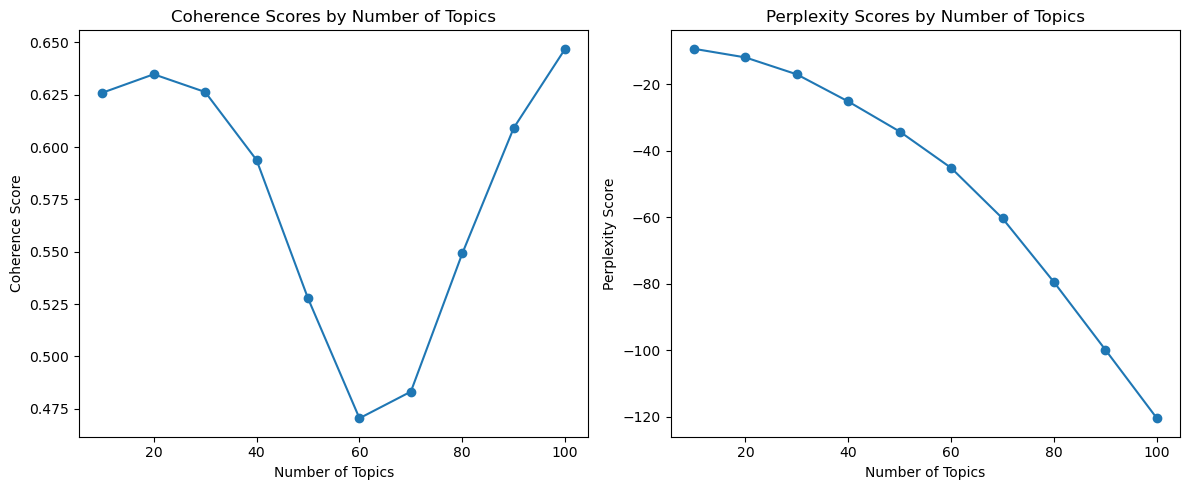

In [46]:
import gensim
import gensim.corpora as corpora
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import matplotlib.pyplot as plt

nltk.download('stopwords')
nltk.download('wordnet')

# Function to preprocess text
def preprocess(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in gensim.utils.simple_preprocess(text) if word not in stop_words]

# Assuming 'documents' is your list of documents
processed_docs = [preprocess(doc) for doc in df['track_name']]

# Create Dictionary and Corpus
dictionary = corpora.Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

topics_range = range(10, 101, 10)
coherence_scores = []
perplexity_scores = []

for num_topics in topics_range:
    lda_model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, random_state=42)

    # Compute Coherence Score
    coherence_model = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
    coherence_scores.append(coherence_model.get_coherence())

    # Compute Perplexity Score
    perplexity_scores.append(lda_model.log_perplexity(corpus))

# Plotting
plt.figure(figsize=(12, 5))

# Plot Coherence Score
plt.subplot(1, 2, 1)
plt.plot(topics_range, coherence_scores, marker='o')
plt.title('Coherence Scores by Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')

# Plot Perplexity Score
plt.subplot(1, 2, 2)
plt.plot(topics_range, perplexity_scores, marker='o')
plt.title('Perplexity Scores by Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity Score')

plt.tight_layout()
plt.show()


The ideal number of topics is 10 because the perplexity score is low when number of topics is 10 and also coherent score is good when topics is 10.
Coherence score is high when topics is 100 but the perplexity score is very high when topics are 100. For this reason I have choosen topics as 10.

# distinguishable topics and interpreting their thematic content

In [47]:
optimal_num_topics = 9 # Your chosen optimal number of topics
lda = LatentDirichletAllocation(n_components=optimal_num_topics, random_state=42)
lda.fit(doc_term_matrix)


LatentDirichletAllocation(n_components=9, random_state=42)

In [48]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        print()

n_top_words = 10  # Adjust the number of top words as needed
print_top_words(lda, vectorizer.get_feature_names_out(), n_top_words)


Topic #1:
feat dance remix que tonight bad no da dark hot

Topic #2:
love remix mix me version man dream again somebody single

Topic #3:
my remix feat rock night way mix version time life

Topic #4:
remaster remix feat go se heaven tú amor beat everything

Topic #5:
remix version feat girl te fire my one remastered road

Topic #6:
back remix mix paradise get got are mine blue run

Topic #7:
feat me remix mix light world hard off make away

Topic #8:
me mix feat down remix yo boy party day song

Topic #9:
edit radio mix la feat remix girls rain livin ride



# Thematic Content

Topic #1:
Keywords: feat, dance, remix, tonight, bad, no, da, dark, hot
Possible Theme: Upbeat and energetic dance music with a dark or intense vibe.
Topic #2:
Keywords: love, remix, mix, me, version, man, dream, again, somebody, single
Possible Theme: Love and relationships, possibly with variations in style and emotions.
Topic #3:
Keywords: my, remix, feat, rock, night, way, mix, version, time, life
Possible Theme: Personal experiences, emotions, and reflections, possibly with a mix of rock elements.
Topic #4:
Keywords: remaster, remix, feat, go, se, heaven, tú, amor, beat, everything
Possible Theme: Positive and uplifting themes, possibly with references to love and spirituality.
Topic #5:
Keywords: remix, version, feat, girl, te, fire, my, one, remastered, road
Possible Theme: Varied themes, including relationships, self-discovery, and journeys.
Topic #6:
Keywords: back, remix, mix, paradise, get, got, are, mine, blue, run
Possible Theme: Themes of returning, seeking paradise, or running towards something.
Topic #7:
Keywords: feat, me, remix, mix, light, world, hard, off, make, away
Possible Theme: Ambitious and dynamic themes, possibly with references to personal growth and overcoming challenges.
Topic #8:
Keywords: me, mix, feat, down, remix, yo, boy, party, day, song
Possible Theme: Party and celebration themes, possibly with a mix of personal experiences.
Topic #9:
Keywords: edit, radio, mix, la, feat, remix, girls, rain, livin, ride
Possible Theme: Diverse themes, including radio edits, rain, and possibly lifestyle references.